In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
import warnings
warnings.filterwarnings('ignore')
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e10/sample_submission.csv
/kaggle/input/playground-series-s5e10/train.csv
/kaggle/input/playground-series-s5e10/test.csv


<div style="text-align: center;">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTZjMDliOTUyM3R5Y2t6bXRldjFoOXAyZjBodXlhcGs5bTBoNzJja2k1cTZpdmJ3aiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/xT5LMu9oZLXY9QSsYo/200w.gif" alt="Highway Accident" style="width:400px; height:auto;">
  <p><b>Goal: Predict the likelihood of accidents on different types of roads</b></p>
</div>



In [2]:

train = pd.read_csv("/kaggle/input/playground-series-s5e10/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e10/test.csv")
sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e10/sample_submission.csv")


print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample_submission.shape)

#  Preview datasets
print("\n--- Train Head ---")
display(train.head())

print("\n--- Test Head ---")
display(test.head())

print("\n--- Sample Submission Head ---")
display(sample_submission.head())

Train shape: (517754, 14)
Test shape: (172585, 13)
Sample submission shape: (172585, 2)

--- Train Head ---


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56



--- Test Head ---


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3



--- Sample Submission Head ---


,id,accident_risk
0,517754,0.352
1,517755,0.352
2,517756,0.352
3,517757,0.352
4,517758,0.352


In [3]:
#  Check data types, nulls, unique counts
def dataset_overview(df, name="Dataset"):
    print(f"\n{name} Overview")
    print("="*40)
    print(df.info())
    
    # Missing values
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if len(missing) > 0:
        print("\nMissing Values:")
        print(missing)
    else:
        print("\nNo missing values detected.")

    # Unique counts for first few cols
    print("\nUnique values per column (top 10):")
    print(df.nunique().sort_values(ascending=False).head(10))
    
   

dataset_overview(train, "Train")
dataset_overview(test, "Test")


Train Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: b

# Target Variable Analysis

Target Variable Analysis
count    517754.000000
mean          0.352377
std           0.166417
min           0.000000
25%           0.230000
50%           0.340000
75%           0.460000
max           1.000000
Name: accident_risk, dtype: float64

Skewness: 0.37841797634228086
Kurtosis: -0.07669151216367087


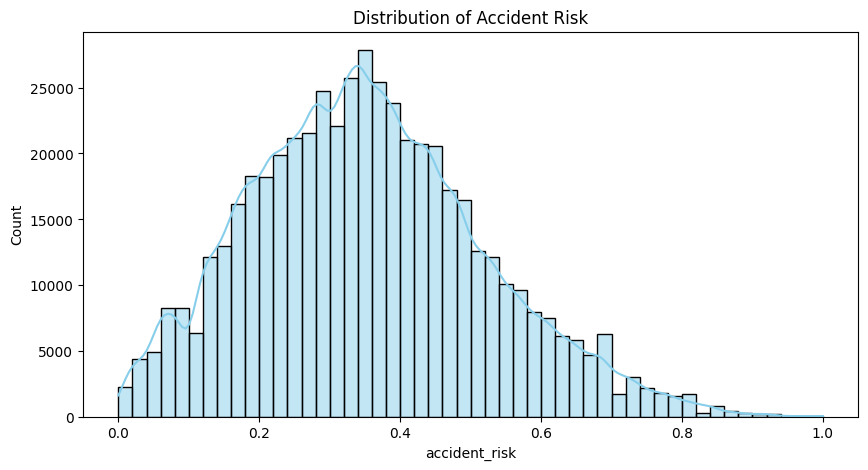

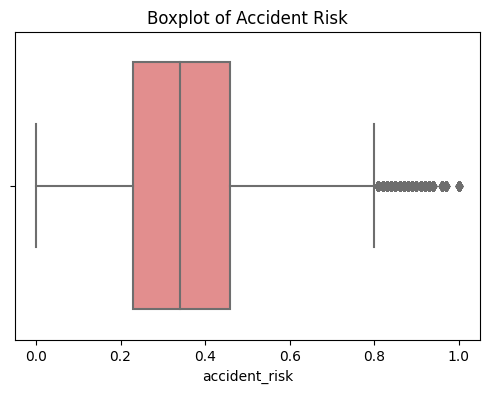

In [4]:
target = "accident_risk"

print("Target Variable Analysis")
print("="*40)
print(train[target].describe())
print("\nSkewness:", train[target].skew())
print("Kurtosis:", train[target].kurtosis())

plt.figure(figsize=(10,5))
sns.histplot(train[target], kde=True, bins=50, color="skyblue")
plt.title("Distribution of Accident Risk")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=train[target], color="lightcoral")
plt.title("Boxplot of Accident Risk")
plt.show()

<div class="alert alert-block alert-info">
<b> Target Variable Analysis (accident_risk)</b><br><br>
- The target variable is continuous in the range [0, 1], representing accident risk.<br>
- Mean risk is ~0.35, indicating average accident probability around 35%.<br>
- Skewness is 0.378 → slightly right-skewed, fairly symmetric.<br>
- Kurtosis is -0.077 → distribution close to normal, no heavy tails.<br>
<b>Insight:</b> The target is well-behaved and suitable for regression. Minor skew may be handled with transformations if needed.
</div>

# Numerical Features Analysis


Numerical Features Summary
           curvature      num_lanes    speed_limit  num_reported_accidents
count  517754.000000  517754.000000  517754.000000           517754.000000
mean        0.488719       2.491511      46.112575                1.187970
std         0.272563       1.120434      15.788521                0.895961
min         0.000000       1.000000      25.000000                0.000000
25%         0.260000       1.000000      35.000000                1.000000
50%         0.510000       2.000000      45.000000                1.000000
75%         0.710000       3.000000      60.000000                2.000000
max         1.000000       4.000000      70.000000                7.000000


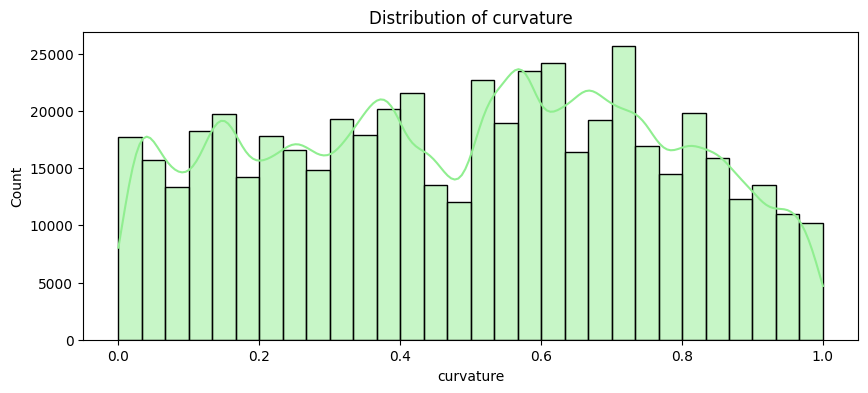

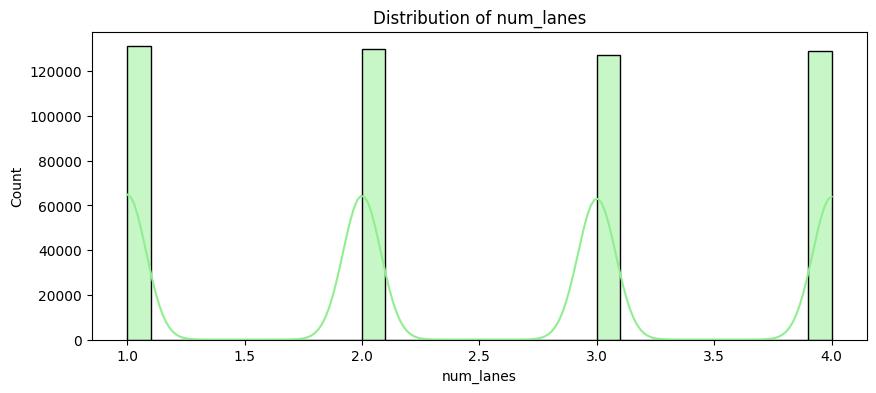

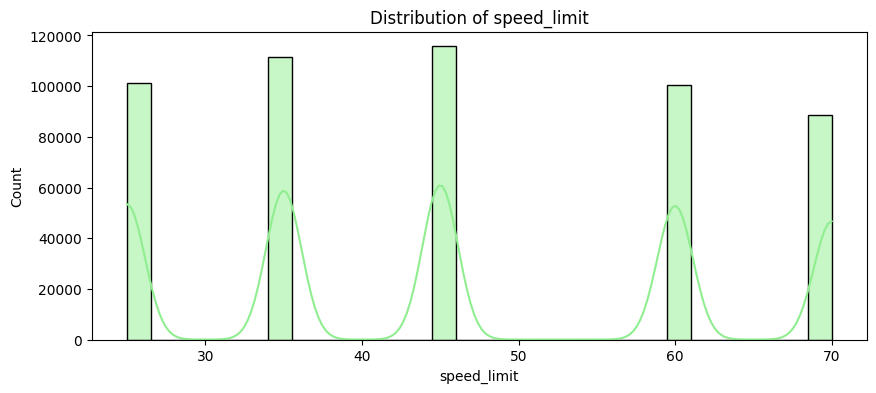

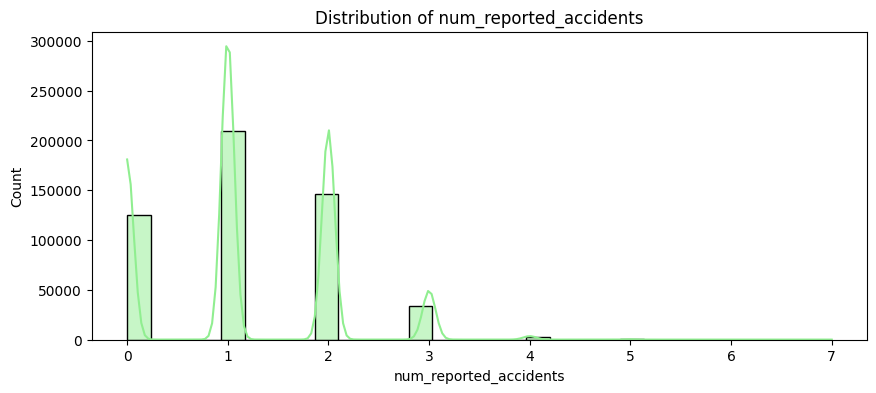


Correlation with target:
accident_risk             1.000000
curvature                 0.543946
speed_limit               0.430898
num_reported_accidents    0.213891
num_lanes                -0.006003
Name: accident_risk, dtype: float64


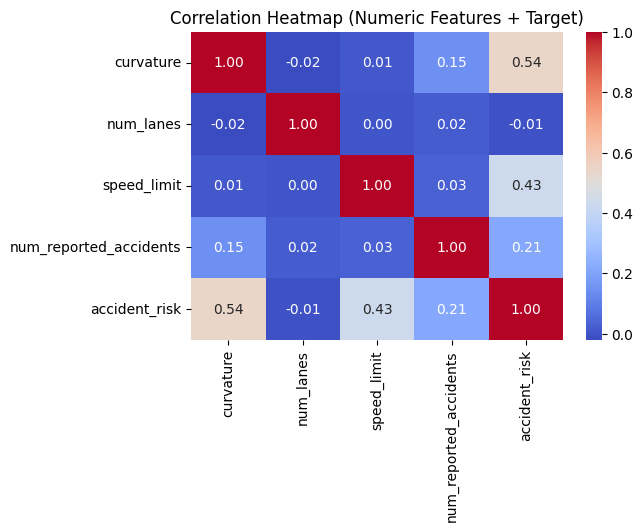

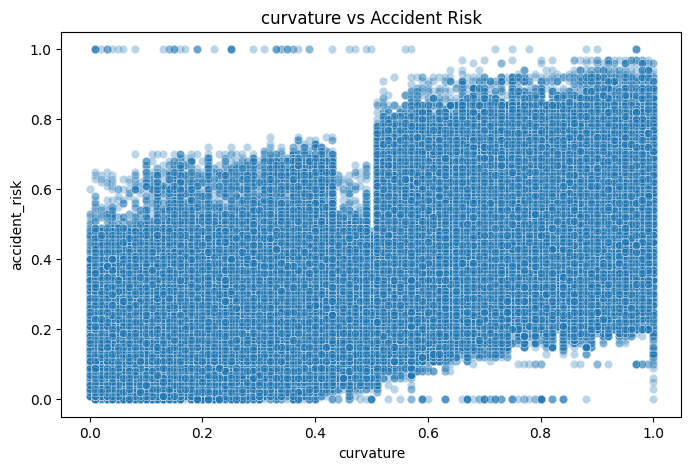

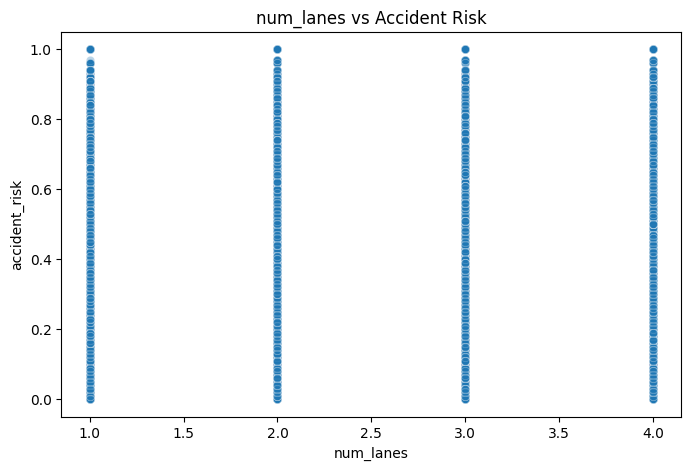

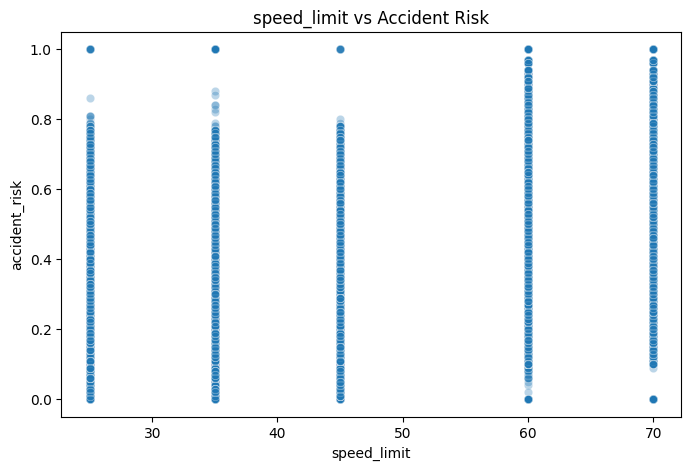

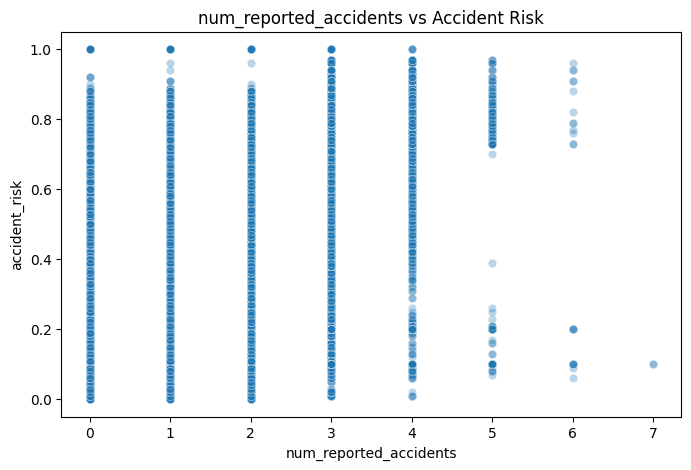

In [5]:
num_features = ["curvature", "num_lanes", "speed_limit", "num_reported_accidents"]

# Summary stats
print("\nNumerical Features Summary")
print("="*40)
print(train[num_features].describe())

# Distribution plots
for col in num_features:
    plt.figure(figsize=(10,4))
    sns.histplot(train[col], kde=True, bins=30, color="lightgreen")
    plt.title(f"Distribution of {col}")
    plt.show()

# Correlation with target
corrs = train[num_features + [target]].corr()[target].sort_values(ascending=False)
print("\nCorrelation with target:")
print(corrs)

plt.figure(figsize=(6,4))
sns.heatmap(train[num_features + [target]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features + Target)")
plt.show()

# Scatterplots with target
for col in num_features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=train[col], y=train[target], alpha=0.3)
    plt.title(f"{col} vs Accident Risk")
    plt.show()


<div class="alert alert-block alert-info">
<b> Numerical Features Analysis</b><br><br>
- <b>curvature:</b> correlation 0.544 → higher curvature roads have higher accident risk.<br>
- <b>speed_limit:</b> correlation 0.431 → higher speed limits slightly increase risk.<br>
- <b>num_reported_accidents:</b> correlation 0.214 → past accidents weakly predictive.<br>
- <b>num_lanes:</b> correlation -0.006 → negligible effect.<br>
<b>Insight:</b> Most important numeric predictors are <i>curvature</i> and <i>speed_limit</i>. <i>num_lanes</i> may not contribute much and could be transformed or excluded.
</div>

# Categorical Features EDA

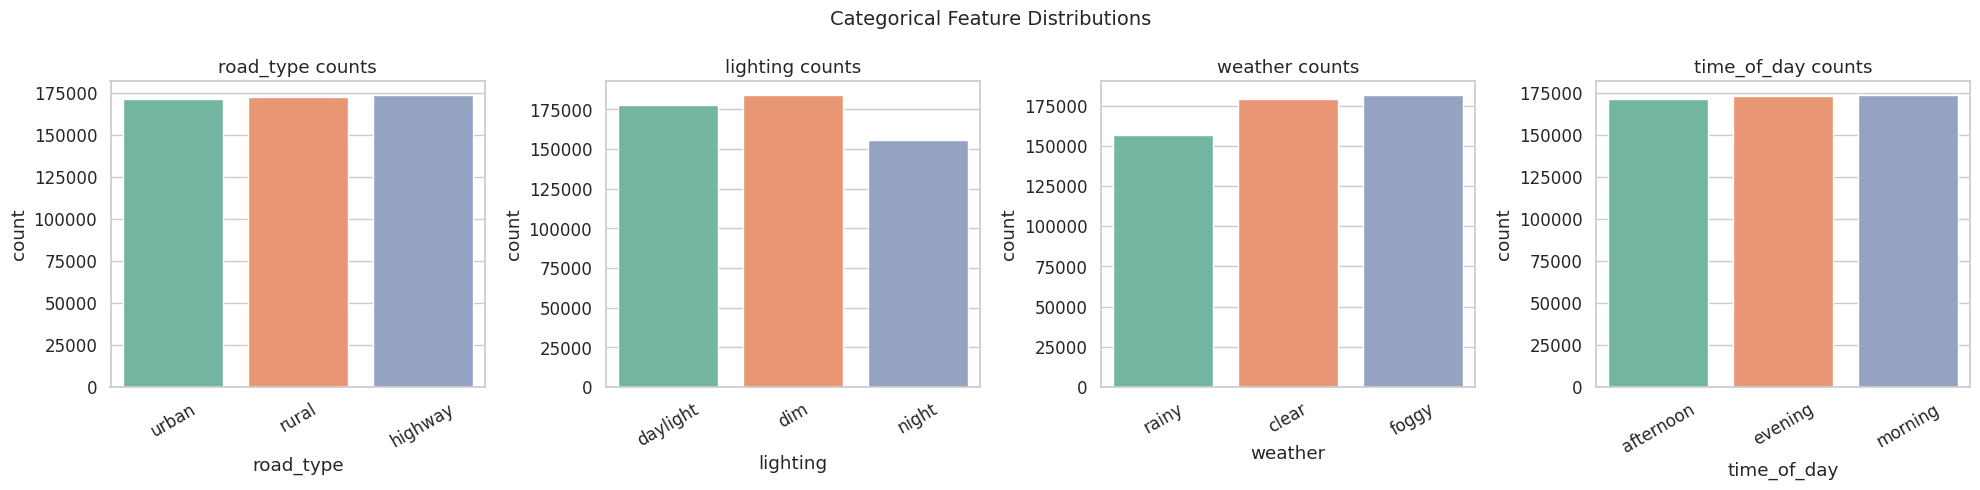

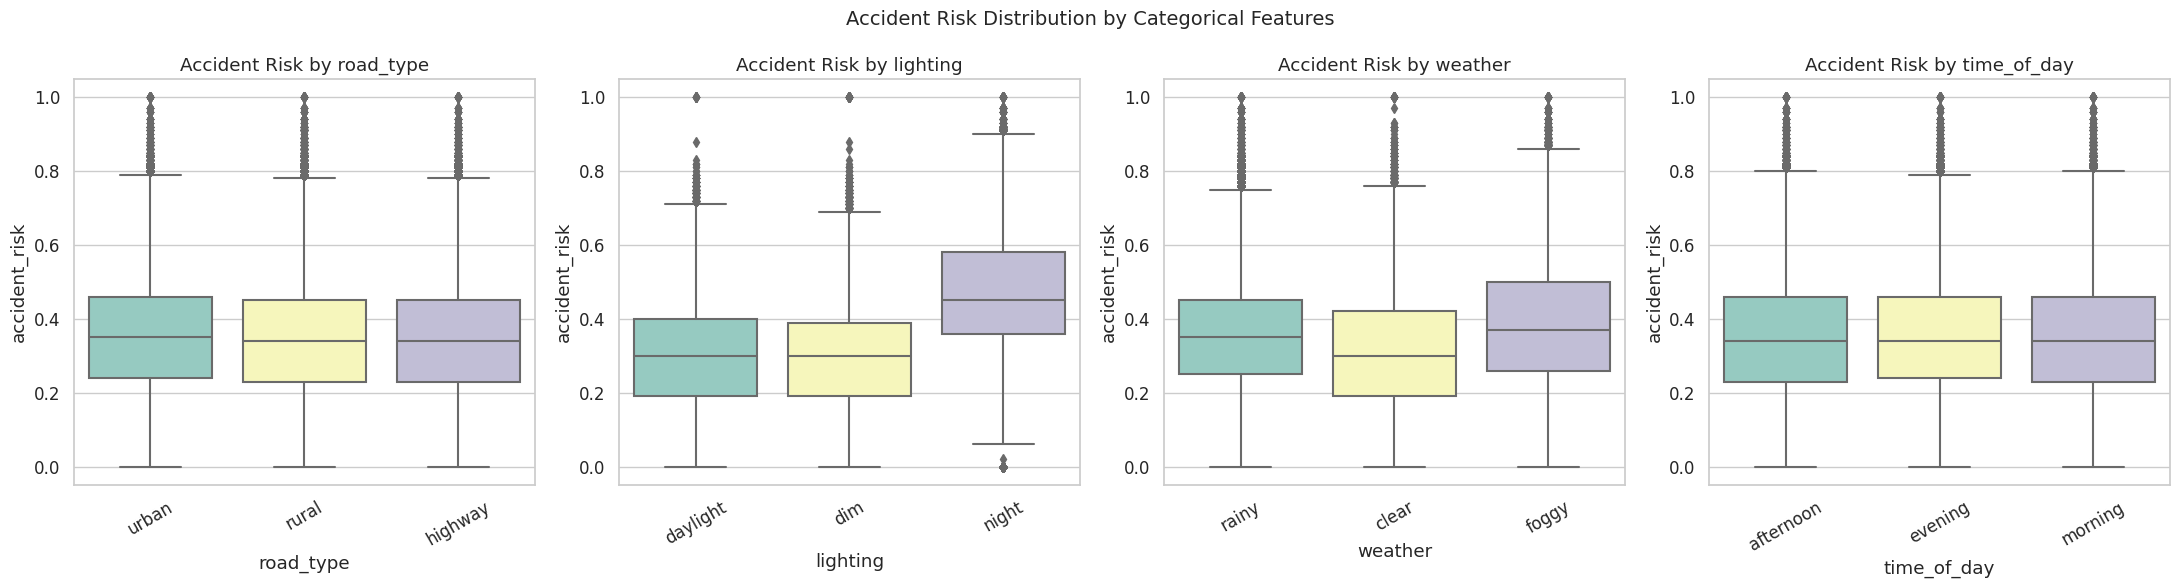


Average Accident Risk by road_type:
road_type
urban      0.357456
rural      0.349997
highway    0.349734
Name: accident_risk, dtype: float64

Average Accident Risk by lighting:
lighting
night       0.470467
daylight    0.302923
dim         0.300109
Name: accident_risk, dtype: float64

Average Accident Risk by weather:
weather
foggy    0.386305
rainy    0.361494
clear    0.310060
Name: accident_risk, dtype: float64

Average Accident Risk by time_of_day:
time_of_day
evening      0.354736
afternoon    0.351428
morning      0.350966
Name: accident_risk, dtype: float64


In [6]:


cat_features = ["road_type", "lighting", "weather", "time_of_day"]
target = "accident_risk"

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Countplots (horizontal layout)
fig, axes = plt.subplots(1, len(cat_features), figsize=(20,5))
for i, col in enumerate(cat_features):
    sns.countplot(data=train, x=col, ax=axes[i])
    axes[i].set_title(f"{col} counts")
    axes[i].tick_params(axis='x', rotation=30)
plt.suptitle("Categorical Feature Distributions", fontsize=14)
plt.tight_layout()
plt.show()

# Boxplots of target by category (horizontal layout)
fig, axes = plt.subplots(1, len(cat_features), figsize=(22,6))
for i, col in enumerate(cat_features):
    sns.boxplot(data=train, x=col, y=target, ax=axes[i], palette="Set3")
    axes[i].set_title(f"Accident Risk by {col}")
    axes[i].tick_params(axis='x', rotation=30)
plt.suptitle("Accident Risk Distribution by Categorical Features", fontsize=14)
plt.tight_layout()
plt.show()

# Mean target per category (tabular summary)
for col in cat_features:
    mean_risk = train.groupby(col)[target].mean().sort_values(ascending=False)
    print(f"\nAverage Accident Risk by {col}:")
    print(mean_risk)


<div class="alert alert-block alert-info">
<b> Categorical Features Analysis</b><br><br>
- <b>road_type:</b> urban roads have slightly higher risk (0.357) vs highway (0.350).<br>
- <b>lighting:</b> night (0.470) is much riskier than daylight/dim (~0.30).<br>
- <b>weather:</b> foggy (0.386) > rainy (0.361) > clear (0.310) → bad weather increases risk.<br>
- <b>time_of_day:</b> minor differences, evening slightly higher risk (0.354).<br>
<b>Insight:</b> Lighting and weather are strong categorical predictors, while road_type and time_of_day have smaller effects.
</div>

# Boolean Features Analysis

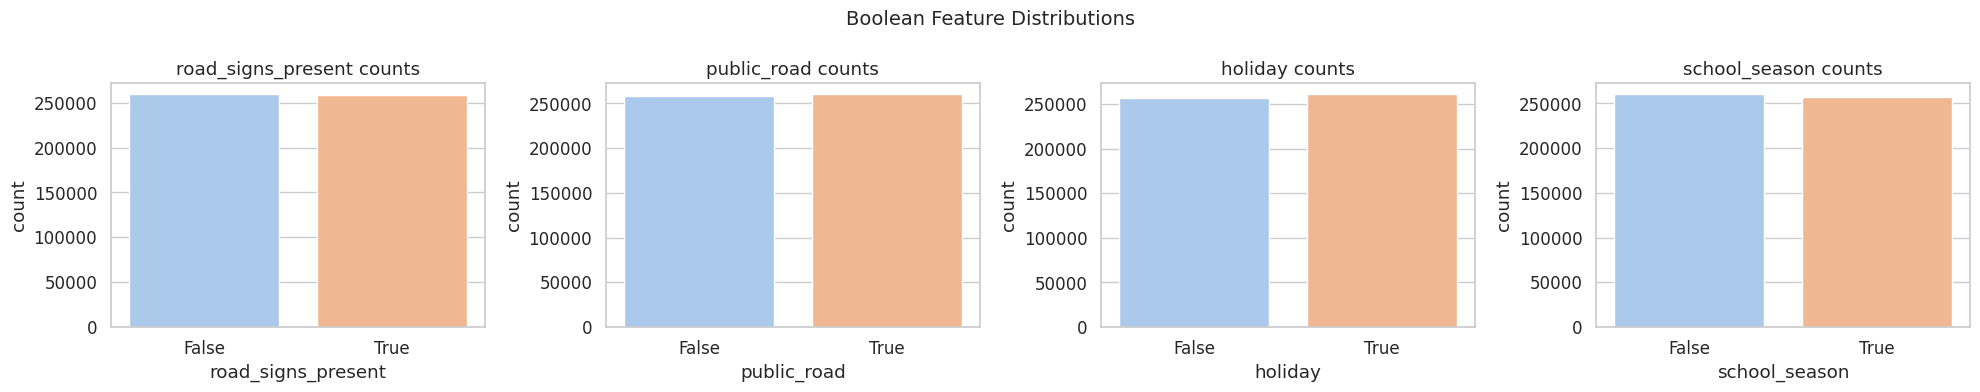

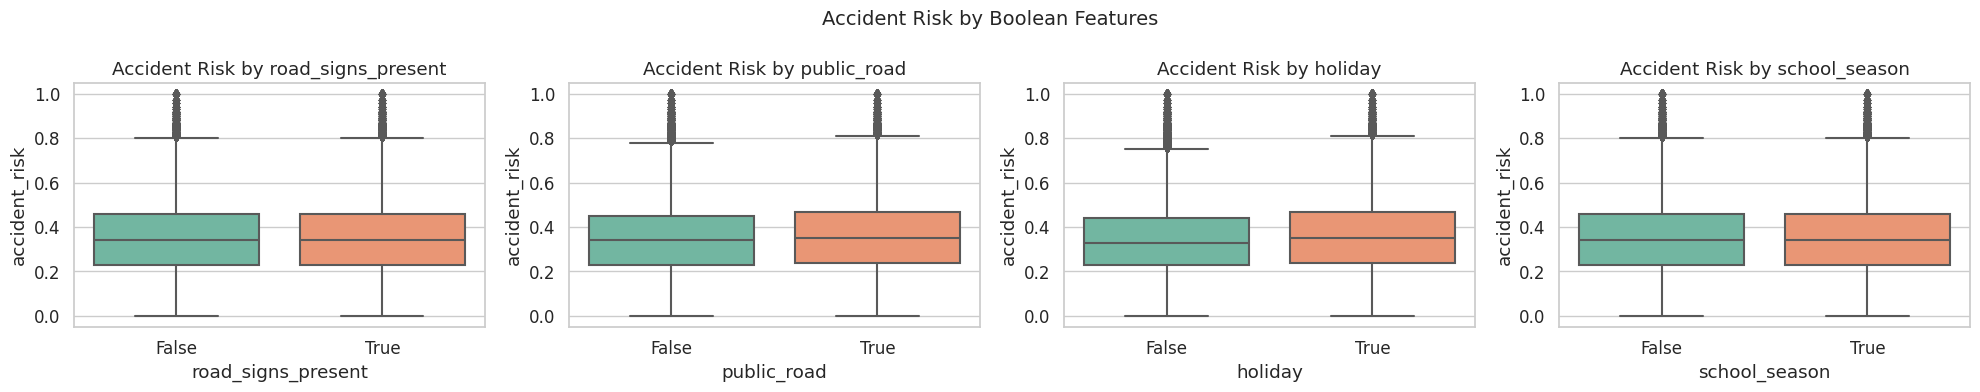


Average Accident Risk by road_signs_present:
road_signs_present
True     0.352482
False    0.352273
Name: accident_risk, dtype: float64

Average Accident Risk by public_road:
public_road
True     0.357518
False    0.347190
Name: accident_risk, dtype: float64

Average Accident Risk by holiday:
holiday
True     0.360827
False    0.343809
Name: accident_risk, dtype: float64

Average Accident Risk by school_season:
school_season
False    0.352539
True     0.352214
Name: accident_risk, dtype: float64


In [7]:
bool_features = ["road_signs_present", "public_road", "holiday", "school_season"]

# Countplots 
fig, axes = plt.subplots(1, len(bool_features), figsize=(20,4))
for i, col in enumerate(bool_features):
    sns.countplot(data=train, x=col, ax=axes[i], palette="pastel")
    axes[i].set_title(f"{col} counts")
plt.suptitle("Boolean Feature Distributions", fontsize=14)
plt.tight_layout()
plt.show()

# Boxplots: target distribution per boolean feature
fig, axes = plt.subplots(1, len(bool_features), figsize=(20,4))
for i, col in enumerate(bool_features):
    sns.boxplot(data=train, x=col, y=target, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Accident Risk by {col}")
plt.suptitle("Accident Risk by Boolean Features", fontsize=14)
plt.tight_layout()
plt.show()

# Mean target per boolean feature
for col in bool_features:
    mean_risk = train.groupby(col)[target].mean().sort_values(ascending=False)
    print(f"\nAverage Accident Risk by {col}:")
    print(mean_risk)

<div class="alert alert-block alert-info">
<b>Boolean Features Analysis</b><br><br>
- <b>road_signs_present:</b> Accident risk almost identical whether road signs are present or not (0.352 vs 0.352).<br>
- <b>public_road:</b> Slightly higher risk on public roads (0.358) compared to private roads (0.347).<br>
- <b>holiday:</b> Accident risk increases on holidays (0.361) vs non-holidays (0.344).<br>
- <b>school_season:</b> No significant difference in risk (0.352 for both).<br>
<b>Insight:</b> Most boolean features have minimal effect, except 'public_road' and 'holiday' which show slight increase in accident risk. These could be useful for modeling.
</div>


# Multivariate Relationships

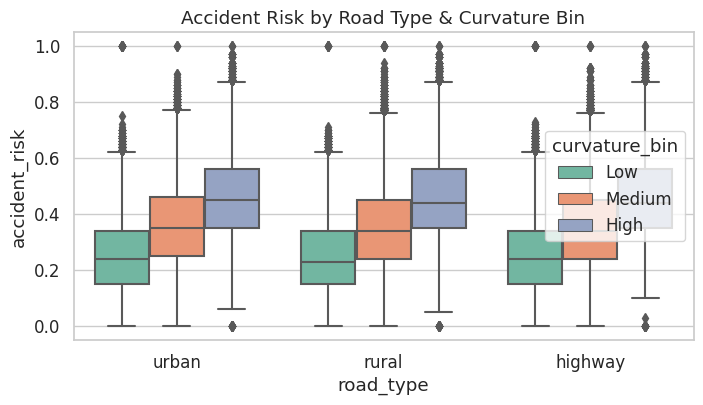

In [8]:
# bin curvature into 3 categories
train['curvature_bin'] = pd.qcut(train['curvature'], q=3, labels=['Low','Medium','High'])

plt.figure(figsize=(8,4))
sns.boxplot(x='road_type', y=target, hue='curvature_bin', data=train, palette="Set2")
plt.title("Accident Risk by Road Type & Curvature Bin")
plt.show()




# Outliers & Anomalies Detection

Number of outlier rows (z-score > 3): 2649


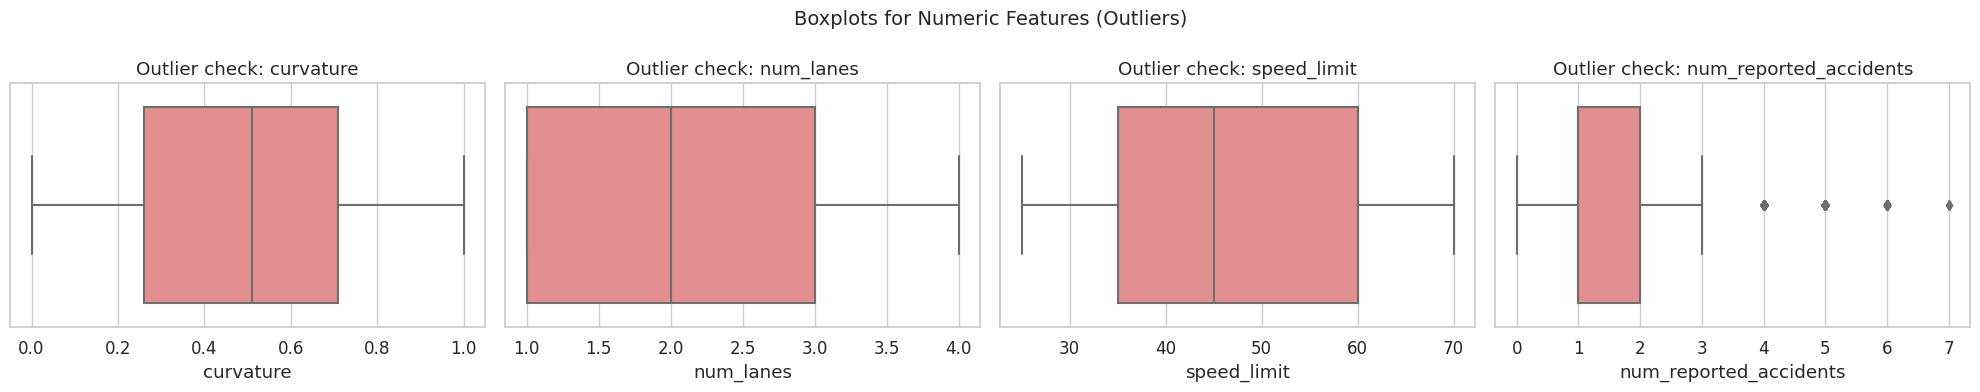

In [9]:
from scipy import stats

# Z-score method for numeric features
z_scores = np.abs(stats.zscore(train[num_features]))
outlier_rows = (z_scores > 3).any(axis=1)
print(f"Number of outlier rows (z-score > 3): {outlier_rows.sum()}")

# Boxplots highlighting outliers
fig, axes = plt.subplots(1, len(num_features), figsize=(20,4))
for i, col in enumerate(num_features):
    sns.boxplot(data=train, x=train[col], ax=axes[i], color="lightcoral")
    axes[i].set_title(f"Outlier check: {col}")
plt.suptitle("Boxplots for Numeric Features (Outliers)", fontsize=14)
plt.tight_layout()
plt.show()

#  Data Preprocessing & Feature Encoding

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

In [11]:
target = "accident_risk"
id_col = "id"

num_features = ["curvature", "speed_limit", "num_reported_accidents", "num_lanes"]
cat_features = ["road_type", "lighting", "weather", "time_of_day"]
bool_features = ["road_signs_present", "public_road", "holiday", "school_season"]


X = train.drop(columns=[target, id_col])
y = train[target]


***Define preprocessing for each feature type***

In [12]:
# Numeric pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Boolean pipeline
bool_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', 'passthrough')  # Already True/False → handled as 1/0 later
])




# 4. Combine all pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
    ('bool', bool_pipeline, bool_features)
])

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Validation shape:", X_valid.shape)

Training shape: (414203, 13)
Validation shape: (103551, 13)


In [14]:
# Convert boolean columns to integers (0 and 1)
bool_cols = X_train.select_dtypes(include='bool').columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_valid[bool_cols] = X_valid[bool_cols].astype(int)

# Now  fit and transform
X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)

print("Transformed Training shape:", X_train_prep.shape)
print("Transformed Validation shape:", X_valid_prep.shape)

Transformed Training shape: (414203, 20)
Transformed Validation shape: (103551, 20)


# STEP 8: MODEL SELECTION & TRAINING

In [15]:


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


models = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}


results = []

for name, model in models.items():
    # Train
    model.fit(X_train_prep, y_train)
    
    # Predict on validation set
    y_pred = model.predict(X_valid_prep)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    mae = mean_absolute_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

# --------------------------
# 3. Display results

results_df = pd.DataFrame(results).sort_values(by="RMSE")
results_df



,Model,RMSE,MAE,R²
2,Gradient Boosting Regressor,0.057020,0.044364,0.882250
1,Random Forest Regressor,0.059412,0.046109,0.872165
0,Decision Tree Regressor,0.083240,0.064034,0.749065


<div class="alert alert-block alert-info">
<b> Insights – Generate Submission</b><br><br>
- Preprocessed the test set using the same pipeline as training data.<br>
- Used the Gradient Boosting Regressor (best-performing model) to predict continuous accident risk values.<br>
- Prepared the submission DataFrame with two columns: <code>id</code> and <code>accident_risk</code>.<br>
- Rounded predictions to 3 decimal places to match sample submission format.<br>
- Saved the submission as <code>submission.csv</code>, ready for Kaggle upload.
</div>


# PREDICTIONS & SUBMISSION

In [16]:

X_test = test.drop(columns=["id"])

# Convert boolean columns to int 
bool_cols = X_test.select_dtypes(include='bool').columns
X_test[bool_cols] = X_test[bool_cols].astype(int)

# Apply the same preprocessing as training data
X_test_prep = preprocessor.transform(X_test)


best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train_prep, y_train)  
predictions = best_model.predict(X_test_prep)

# --------------------------
# 3. Prepare submission DataFrame

submission = pd.DataFrame({
    "id": test["id"],
    "accident_risk": predictions
})

# Round predictions to 3 decimals (as in sample submission)
submission["accident_risk"] = submission["accident_risk"].round(3)


submission.to_csv("submission.csv", index=False)
submission.head()



,id,accident_risk
0,517754,0.290
1,517755,0.128
2,517756,0.190
3,517757,0.351
4,517758,0.411


In [17]:
import joblib


model_filename = "gradient_boosting_model.pkl"
joblib.dump(best_model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as gradient_boosting_model.pkl


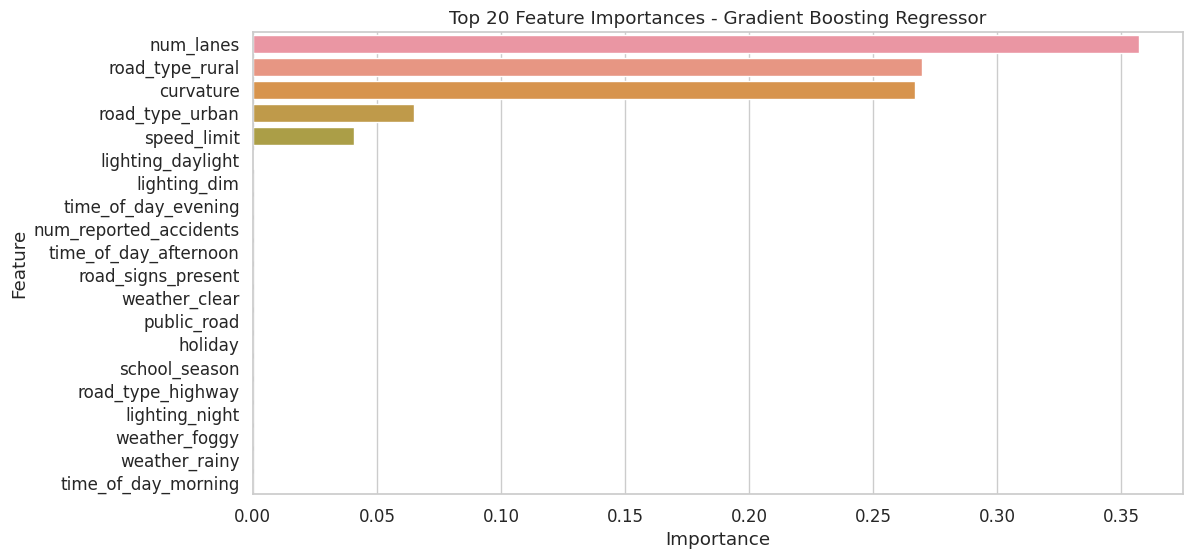

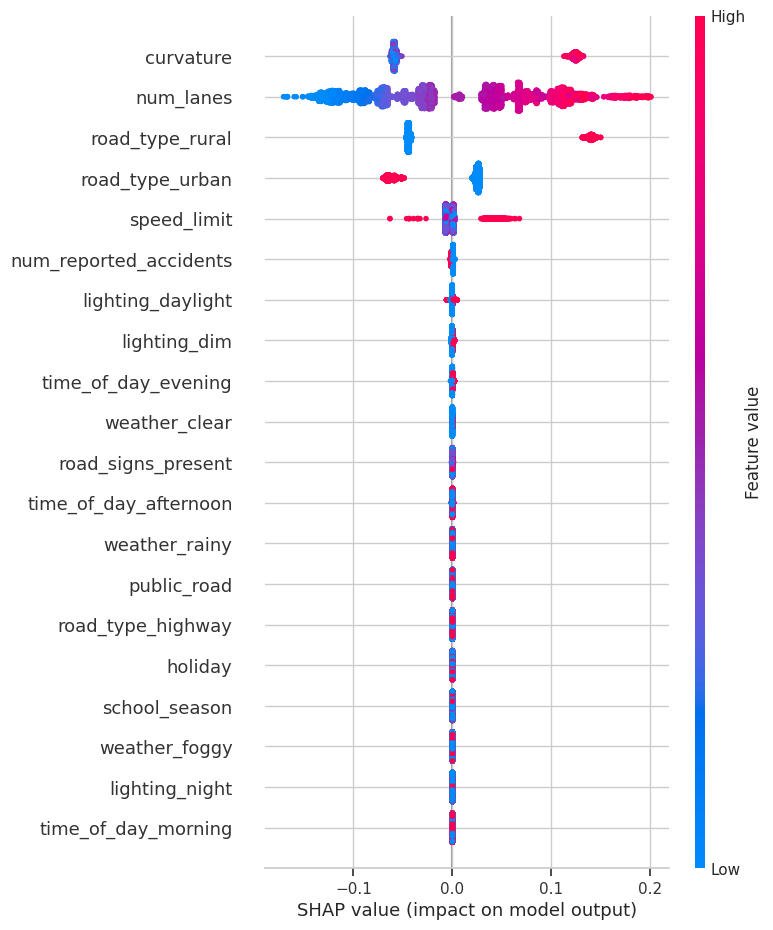

In [18]:


import matplotlib.pyplot as plt
import seaborn as sns
import shap
import numpy as np

# --------------------------
# 0. Define feature groups
# --------------------------
numeric_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# --------------------------
# 1. Feature Importance (Gradient Boosting)
# --------------------------
# Get transformed feature names from preprocessor
# If using OneHotEncoder in ColumnTransformer
cat_ohe = preprocessor.named_transformers_['cat']['onehot']
cat_feature_names = cat_ohe.get_feature_names_out(categorical_features)

feature_names = np.concatenate([numeric_features, cat_feature_names])

# Extract feature importances
importances = best_model.feature_importances_

# Create DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(20))
plt.title("Top 20 Feature Importances - Gradient Boosting Regressor")
plt.show()

# --------------------------
# 2. Optional: SHAP values (slower, for explanation)
# --------------------------
explainer = shap.Explainer(best_model, X_train_prep)
shap_values = explainer(X_valid_prep[:5000])  # sample for speed
shap.summary_plot(shap_values, features=X_valid_prep[:5000], feature_names=feature_names)


<div class="alert alert-block alert-info">

**Model Interpretation Results**

- The **Gradient Boosting Regressor** identified the most important factors contributing to accident risk.
- **Top features:** `num_lanes`, `road_type_rural`, and `curvature` — these have the highest influence on predicting accident likelihood.
- **Additional factors:** `road_type_urban`, `speed_limit`, and lighting/time-of-day conditions also had moderate impact.
- The **SHAP summary plot** confirms these variables as key drivers, showing that higher road curvature, more lanes, and rural road types increase predicted risk.
- These insights can guide targeted road safety improvements and better traffic management strategies.

</div>


***Hope you found this notebook useful! If you liked it, please **upvote 👍*****